In [1]:
from scripts import dataset, metrics
from sklearn.model_selection import KFold

In [2]:
import numpy as np
import h5py

In [48]:
len(bkg)

9845600

In [3]:
bkg = dataset.load_dataset('NuGun_preprocessed.h5', 'full_data_cyl')

In [42]:
s = 0

In [46]:
s

[2, 3, 47, 2]

In [45]:
s = [2,3,47,2]

In [39]:
kf = KFold(n_splits=50)

In [40]:
oooo = list(kf.split(bkg))

In [41]:
oooo

[(array([ 196912,  196913,  196914, ..., 9845597, 9845598, 9845599]),
  array([     0,      1,      2, ..., 196909, 196910, 196911])),
 (array([      0,       1,       2, ..., 9845597, 9845598, 9845599]),
  array([196912, 196913, 196914, ..., 393821, 393822, 393823])),
 (array([      0,       1,       2, ..., 9845597, 9845598, 9845599]),
  array([393824, 393825, 393826, ..., 590733, 590734, 590735])),
 (array([      0,       1,       2, ..., 9845597, 9845598, 9845599]),
  array([590736, 590737, 590738, ..., 787645, 787646, 787647])),
 (array([      0,       1,       2, ..., 9845597, 9845598, 9845599]),
  array([787648, 787649, 787650, ..., 984557, 984558, 984559])),
 (array([      0,       1,       2, ..., 9845597, 9845598, 9845599]),
  array([ 984560,  984561,  984562, ..., 1181469, 1181470, 1181471])),
 (array([      0,       1,       2, ..., 9845597, 9845598, 9845599]),
  array([1181472, 1181473, 1181474, ..., 1378381, 1378382, 1378383])),
 (array([      0,       1,       2, ..., 98

In [21]:
for i, (train_index, test_index) in enumerate(kf.split(bkg)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 984560  984561  984562 ... 9845597 9845598 9845599]
  Test:  index=[     0      1      2 ... 984557 984558 984559]
Fold 1:
  Train: index=[      0       1       2 ... 9845597 9845598 9845599]
  Test:  index=[ 984560  984561  984562 ... 1969117 1969118 1969119]
Fold 2:
  Train: index=[      0       1       2 ... 9845597 9845598 9845599]
  Test:  index=[1969120 1969121 1969122 ... 2953677 2953678 2953679]
Fold 3:
  Train: index=[      0       1       2 ... 9845597 9845598 9845599]
  Test:  index=[2953680 2953681 2953682 ... 3938237 3938238 3938239]
Fold 4:
  Train: index=[      0       1       2 ... 9845597 9845598 9845599]
  Test:  index=[3938240 3938241 3938242 ... 4922797 4922798 4922799]
Fold 5:
  Train: index=[      0       1       2 ... 9845597 9845598 9845599]
  Test:  index=[4922800 4922801 4922802 ... 5907357 5907358 5907359]
Fold 6:
  Train: index=[      0       1       2 ... 9845597 9845598 9845599]
  Test:  index=[5907360 5907361 5907362 ... 6891917 6

In [34]:
kf = KFold(n_splits=5)
kf_splits = list(kf.split(bkg))

fold_number = 5  # Change to the desired fold number
train_index, test_index = kf_splits[fold_number - 1]  # Subtract 1 since indexing starts from 0

# Getting the actual data for the training and testing sets
train_data = bkg[train_index]
test_data = bkg[test_index]

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (7876480, 99)
Test data shape: (1969120, 99)


In [12]:
for train, test in kf.split(bkg):
    print("%s %s" % (train, test))

[ 984560  984561  984562 ... 9845597 9845598 9845599] [     0      1      2 ... 984557 984558 984559]
[      0       1       2 ... 9845597 9845598 9845599] [ 984560  984561  984562 ... 1969117 1969118 1969119]
[      0       1       2 ... 9845597 9845598 9845599] [1969120 1969121 1969122 ... 2953677 2953678 2953679]
[      0       1       2 ... 9845597 9845598 9845599] [2953680 2953681 2953682 ... 3938237 3938238 3938239]
[      0       1       2 ... 9845597 9845598 9845599] [3938240 3938241 3938242 ... 4922797 4922798 4922799]
[      0       1       2 ... 9845597 9845598 9845599] [4922800 4922801 4922802 ... 5907357 5907358 5907359]
[      0       1       2 ... 9845597 9845598 9845599] [5907360 5907361 5907362 ... 6891917 6891918 6891919]
[      0       1       2 ... 9845597 9845598 9845599] [6891920 6891921 6891922 ... 7876477 7876478 7876479]
[      0       1       2 ... 9845597 9845598 9845599] [7876480 7876481 7876482 ... 8861037 8861038 8861039]
[      0       1       2 ... 88610

In [3]:
x_train, x_test = dataset.create_xtrain_xtest()

In [4]:
signal = dataset.load_dataset('BSM_preprocessed.h5', 'GluGluHToTauTau')

In [5]:
kwargs = {'ndim': 1, 'ntrees': 100}#, 'scoring_metric': 'density'}


In [6]:
score_met = ['density', 'boxed_density']
mean_curve = {}
error_curve= {}
base= {}
auc_mean= {}
auc_unc= {}

for idx, scoring_metric in enumerate(score_met):
    kwargs['scoring_metric'] = scoring_metric
    mean_curve[idx], error_curve[idx], base[idx], auc_mean[idx], auc_unc[idx] = metrics.get_seed_uncertainty(kwargs, x_test, signal)

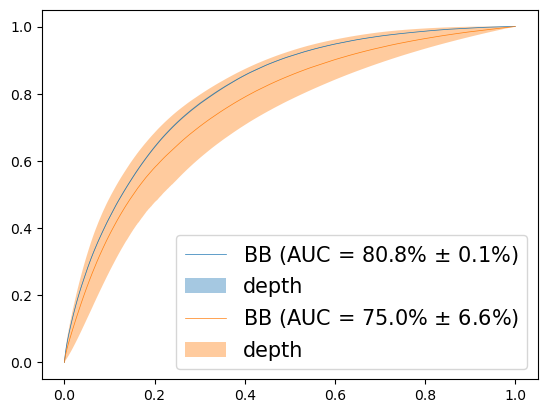

: 

In [12]:
for i in range(0,2):
    plt.plot(base[i], mean_curve[i], lw=0.5, label='BB (AUC = %.1f%% $\pm$ %.1f%%)' % (auc_mean[i] * 100, auc_unc[i] * 100))
    plt.fill_between(base[i],
                    mean_curve[i] - error_curve[i],
                    mean_curve[i] + error_curve[i],
                    alpha=0.4,
                label = 'depth')
    plt.legend(loc='lower right',fontsize=15)

In [7]:
import matplotlib.pyplot as plt

In [27]:
aucs

{0: 0.7986359643537262,
 1: 0.798894385700199,
 2: 0.7914440939541036,
 3: 0.8164322451129566,
 4: 0.7962535440894594,
 5: 0.8166073000252623,
 6: 0.8167336142908777,
 7: 0.7875644795157288,
 8: 0.8149509737776037,
 9: 0.8155906594231099,
 10: 0.8152116075480615,
 11: 0.6856471833131171,
 12: 0.6847025481498242,
 13: 0.8063029945019374,
 14: 0.8145165669428285,
 15: 0.6779728681669391,
 16: 0.8085602685361672,
 17: 0.8087960527515912,
 18: 0.8161933687439528,
 19: 0.7914397526644685,
 20: 0.816177606890812,
 21: 0.7971261058382384,
 22: 0.816577988429546,
 23: 0.7892250817075736,
 24: 0.7893128882682875,
 25: 0.7964191482840906,
 26: 0.8149870709987949,
 27: 0.8166177955427868,
 28: 0.8144551019312485,
 29: 0.68847014150474,
 30: 0.8065278028620422,
 31: 0.8144568993467628,
 32: 0.8149147444428694,
 33: 0.6835134364863769,
 34: 0.8077693991648738}

In [28]:
import numpy as np

In [31]:
unc = np.std(list(aucs.values()))

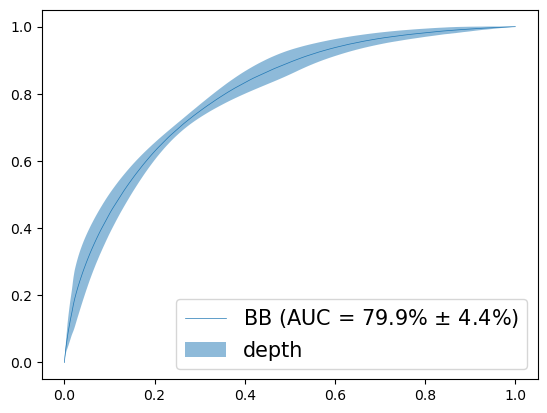

In [37]:
plt.plot(base, mean_curve, lw=0.5, label='BB (AUC = %.1f%% $\pm$ %.1f%%)' % (aucs[0] * 100, unc * 100))
plt.fill_between(base,
                mean_curve - error_curve,
                mean_curve + error_curve,
                alpha=0.5,
            label = 'depth')
plt.legend(loc='lower right',fontsize=15)

In [ ]:
askj

In [ ]:
dasf

In [ ]:
x_train, x_test = dataset.create_xtrain_xtest()
signal = dataset.load_dataset('BSM_preprocesssed.h5', 'GluGluHToTauTau')

In [ ]:
kwargs = {'ndim': 1, 'ntrees': 100}#, 'scoring_metric': 'density'}


In [ ]:
# seed_choice = [0,1,2,3,4]
# scoring_metrics = ['boxed_density','boxed_density2']
# for scores in scoring_metrics:
#     kwargs['scoring_metric'] = scores
#     for seed in seed_choice:
#         kwargs['random_seed'] = seed
#         op = metrics.train_and_save_model(kwargs, x_train)
#         print(op)

In [ ]:
mean_curve = {} 
error_curve = {}
base = {}
scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio', 'boxed_density','boxed_density2']
for scoring in scoring_metrics:
    kwargs['scoring_metric']  = scoring
    mean_curve[scoring], error_curve[scoring], base[scoring] = metrics.get_seed_uncertainty(kwargs, x_test, signal)
    print(scoring)

In [ ]:
import matplotlib.pyplot as plt

# scoring_metrics = ['depth', 'density', 'adj_depth', 'adj_density', 'boxed_ratio','boxed_density2']

scoring_metrics = ['boxed_density']

plt.figure(figsize=(10, 10))
for scoring in scoring_metrics:

    plt.plot(base[scoring],mean_curve[scoring], linewidth=1, label=f'{scoring}') #(AUC = %.1f%%)' % (AUC * 100))
    
    plt.fill_between(base[scoring],
                mean_curve[scoring] - error_curve[scoring],
                mean_curve[scoring] + error_curve[scoring],
                alpha=0.5,
            label = scoring)
    print(scoring)
plt.plot(np.linspace(0, 1), np.linspace(0, 1), '--', color='0.75')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)    
plt.semilogx()
plt.semilogy()  
plt.xlim([10**-(6), 1.0])
plt.ylim([10**-(6), 1.05])  
plt.legend()
plt.savefig('boxden')

In [ ]:
metrics.plot_auroc_unc_(mean_curve, error_curve, base)


In [ ]:
dafasdfas

In [ ]:
def get_seed_uncertainty(kwargs, x_test, signal):
    # here we assume that we have already trained the models :-)
    model_string = "trained_models/model__" + "__".join([f"{key}_{value}" for key, value in kwargs.items()])+"*"
    model_names = glob.glob(model_string)
    fprs = {}
    tprs = {}
    aucs = {}
    for i in range(len(model_names)):
        fprs[i], tprs[i], aucs[i] = metrics.predict_value(model=model_names[i], x_test=x_test, signal=signal)

    # interpolate

    interp_tpr={}
    base = np.exp(np.linspace(math.log(0.00000005), 0., 1000000)) # bc we are interested in the loglog plot later! :)
    seeds = [0,1,2,3,4]#,39, 23123]
    for i in seeds:
        interp_tpr[i] = np.interp(base, fprs[i], tprs[i])

    mean_curve = np.mean(list(interp_tpr.values()), axis=0)
    error_curve = np.std(list(interp_tpr.values()), axis=0)

    return mean_curve, error_curve, base



def plot_auroc_unc_(mean_curve, error_curve, base):    
    plt.plot(base,mean_curve, linewidth=1.5)
    plt.semilogx()
    plt.semilogy()
    plt.fill_between(base,
                mean_curve - error_curve,
                mean_curve + error_curve,
                alpha=0.5,
            label = 'depth')
    plt.legend()

In [ ]:
x_train, x_test = dataset.create_xtrain_xtest()
signal = dataset.load_dataset('BSM_preprocessed.h5', 'GluGluHToTauTau')

In [ ]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth'}
mean, std, base = get_seed_uncertainty(kwargs=kwargs, x_test=x_test, signal=signal)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plot_auroc_unc_(mean, std, base)
plt.xlim([10**-(6), 1.0])
plt.ylim([10**-(6), 1.05])

In [ ]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth'}
model_string = "trained_models/model__" + "__".join([f"{key}_{value}" for key, value in kwargs.items()])+"*"


In [ ]:
type()

In [ ]:
kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth'}

model_string = "trained_models/model__" + "__".join([f"{key}_{value}" for key, value in kwargs.items()])
print(model_string)
kwargs['random_seed'] = i

In [ ]:
import glob

# Define the pattern to match files
pattern = 'trained_models/model__ndim_1__ntrees_100__scoring_metric_depth*'

# Get a list of file paths matching the pattern
matching_files = glob.glob(pattern)

# Print the names of the matching files
for file_path in matching_files:
    print(file_path)



In [ ]:
matching_files

In [ ]:
model_string

In [ ]:
rands = [0, 1, 2, 3, 4]  

model_names = {}
fprs = {}
tprs = {}
aucs = {}

for i in rands:
    kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth', 'random_seed': i}
    model_names[i] = metrics.train_and_save_model(kwargs, x_train)
    fprs[i], tprs[i], aucs[i] = metrics.predict_value(model=model_names[i], x_test=x_test, signal=signal)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fprs[0],tprs[0])
plt.plot(fprs[1],tprs[1])
plt.plot(fprs[2],tprs[2])
plt.plot(fprs[3],tprs[3])
plt.plot(fprs[4],tprs[4])
plt.semilogx()
plt.semilogy()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fprs[0],tprs[0])
plt.plot(fprs[1],tprs[1])
plt.plot(fprs[2],tprs[2])
plt.plot(fprs[3],tprs[3])
plt.plot(fprs[4],tprs[4])
plt.semilogx()
plt.semilogy()
plt.xlim(0.0000001, 0.000001)
plt.ylim(0.00001, 0.0001)

In [ ]:
import math
interp_tpr={}
base = np.exp(np.linspace(math.log(0.00000005), 0., 1000000)) # bc we are interested in the loglog plot later! :)

for i in range(0,5):
    interp_tpr[i] = np.interp(base, fprs[i], tprs[i])


offo = np.mean(list(interp_tpr.values()), axis=0)
obb = np.std(list(interp_tpr.values()), axis=0)

In [ ]:
offo = np.mean(list(interp_tpr.values()), axis=0)
obb = np.std(list(interp_tpr.values()), axis=0)

In [ ]:
# for i in range(0,5):
#     plt.plot(fprs[i],tprs[i], linewidth=0.3)
plt.plot(base,offo, linewidth=1.5)
plt.semilogx()
plt.semilogy()
plt.fill_between(base,
            offo - obb,
            offo + obb,
            alpha=0.5,
            color='red'
        )

In [ ]:
interp_tprs

In [ ]:
for i in range(0,5):
    plt.plot(base, interp_tpr[i])
    plt.plot(fprs[i],tprs[i])
    plt.semilogx()
    plt.semilogy()
    plt.show()

In [ ]:
plt.plot(fprs[0],tprs[0])
plt.plot(base, interp_tpr[0])

plt.semilogx()
plt.semilogy()

In [ ]:
# import math
# interp_tpr={}
# # base = np.exp(np.linspace(math.log(0.0000005), 0., 1000000)) # bc we are interested in the loglog plot later! :)
# base = np.linspace(math.log(0.0000005), 0., 1000000) # bc we are interested in the loglog plot later! :)

# for i in range(0,5):
#     interp_tpr[i] = interp(base, fprs[i], tprs[i])

In [ ]:
datasets = list(interp_tpr.values())
# std_dev = np.std(datasets, axis=0)
# base_mean = np.mean(datasets, axis=0)

In [ ]:
dasflfa

In [ ]:
# def roc_curves_uncert(
#     tpr: np.ndarray,
#     fprs: np.ndarray,
#     fprs_errs: np.ndarray,
#     aucs: np.ndarray,
#     aucs_errs: np.ndarray,
#     fats: np.ndarray,
#     fats_errs: np.ndarray,
#     outdir: str,
# ):
#     """Plots ROC curves given fprs and tprs for each class."""
#     labels = ["Gluon", "Quark", "W", "Z", "Top"]
#     cols = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000"]
#     tpr_baseline = np.linspace(0.025, 0.99, 100)
#     for idx, label in enumerate(labels):
#         plt.plot(
#             tpr,
#             fprs[idx],
#             color=cols[idx],
#             label=f"{label}: {aucs[idx]*100:.1f}%; FAT: {fats[idx]:.4f} $\\pm$ {fats_errs[idx]:.4f}",
#         )
#         plt.fill_between(
#             tpr,
#             fprs[idx] - fprs_errs[idx],
#             fprs[idx] + fprs_errs[idx],
#             color=cols[idx],
#             alpha=0.5,
#         )

#     plt.xlabel("True Positive Rate")
#     plt.ylabel("False Positive Rate")
#     plt.ylim(0.001, 1)
#     plt.semilogy()

#     plt.legend()
#     plt.savefig(os.path.join(outdir, "roc_curves.pdf"))
#     plt.close()
#     print(f"ROC curves plot saved to {outdir}.")

In [ ]:
# def find_nearest(array: np.ndarray, value: float):
#     """Finds the index of the nearest value in an array to a given value."""
#     array = np.asarray(array)
#     return (np.abs(array - value)).argmin()

In [ ]:
# def roc_curves(outdir: str, y_pred: np.ndarray, y_test: np.ndarray):
#     """Plot the ROC curves for the labels of the jet data set."""
#     labels = ["Gluon", "Quark", "W", "Z", "Top"]
#     cols = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000"]
#     tpr_baseline = np.linspace(0.025, 0.99, 100)
#     fprs = []
#     aucs = []
#     fprs_at_tprs = []
#     for idx, label in enumerate(labels):
#         fpr, tpr, thr = metrics.roc_curve(y_test[:, idx], y_pred[:, idx])
#         auc = metrics.auc(fpr, tpr)
#         aucs.append(auc)
#         fpr_baseline = np.interp(tpr_baseline, tpr, fpr)
#         fprs.append(fpr_baseline)
#         fpr_baseline.astype("float32").tofile(os.path.join(outdir, f"fpr_{label}.dat"))
#         tpr_baseline.astype("float32").tofile(os.path.join(outdir, f"tpr_{label}.dat"))
#         tpr_idx = find_nearest(tpr, 0.8)
#         plt.plot(
#             tpr,
#             fpr,
#             color=cols[idx],
#             label=f"{label}: AUC = {auc*100:.1f}%; FPR @ 80% TPR: {fpr[tpr_idx]:.3f}",
#         )
#         fprs_at_tprs.append(fpr[tpr_idx])

#     plt.xlabel("True Positive Rate")
#     plt.ylabel("False Positive Rate")
#     plt.ylim(0.001, 1)
#     plt.semilogy()

#     plt.legend()
#     plt.savefig(os.path.join(outdir, "roc_curves.pdf"))
#     plt.close()
#     print(f"ROC curves plot saved to {outdir}.")

#     return fprs, tpr_baseline, aucs, fprs_at_tprs

In [ ]:
# np.mean(value, axis=0), f"{key}_errs": np.std(value, axis=0)

In [ ]:
from scipy import interp

In [ ]:
#   fig = plt.figure()
#   ax = fig.add_subplot()
    
#   for i, label in enumerate(labels):
    
#     npoints = 50
#     base_fpr = np.exp(np.linspace(math.log(0.0005), 0., npoints))

#     First = True
#     tpr_array = np.array([])
#     auc_array = []
    
#     for fold in folds:
#       this_fpr         = np.array(fprs[label][fold])
#       this_tpr         = np.array(tprs[label][fold])
#       tpr_interpolated = interp(base_fpr, this_fpr, this_tpr)
#       tpr_interpolated = tpr_interpolated.reshape((1,npoints))
#       tpr_array        = np.concatenate([tpr_array, tpr_interpolated], axis=0) if tpr_array.size else tpr_interpolated
#       auc_array.append(aucs[label][fold])
#       print('aucs[{}][{}]={}'.format(label,fold,aucs[label][fold]))
    

#         mean_tpr  = np.mean(tpr_array, axis=0)
#     rms_tpr   = np.std(tpr_array, axis=0)
#     plus_tpr  = np.minimum(mean_tpr+rms_tpr, np.ones(npoints))
#     minus_tpr = np.maximum(mean_tpr-rms_tpr,np.zeros(npoints))
#     avg_tpr   = mean_tpr

#     auc_array = np.array(auc_array)
#     Mean_AUC  = float(np.mean(auc_array, axis=0))
#     RMS_AUC   = float(np.std(auc_array, axis=0))
    
#     print('label')
#     print(label)
#     print('Mean_AUC' )
#     print(Mean_AUC )
#     print('RMS_AUC ')
#     print(RMS_AUC)
#     print('{}) AUC = {} pm {}'.format(label,Mean_AUC,RMS_AUC))

#     plt.plot(base_fpr,avg_tpr,label=r'{} (AUC = {:.4f} $\pm$ {:.4f})'.format(label.replace('j_',''),Mean_AUC,RMS_AUC), linewidth=1.5, color=colors[i])
#     plt.fill_between(base_fpr, minus_tpr, plus_tpr, alpha=0.3, color=colors[i])

#   plt.semilogx()
#   plt.ylabel("True Positive Rate")
#   plt.xlabel("False Positive Rate")
#   plt.xlim(0.0005,1.)
#   plt.ylim(0.2,1.2)
#   add_logo(ax, fig, 0.3, position='upper right')


In [ ]:
import math
interp_tpr={}
# base = np.exp(np.linspace(math.log(0.0000005), 0., 1000000)) # bc we are interested in the loglog plot later! :)
base = np.linspace(math.log(0.0000005), 0., 1000000) # bc we are interested in the loglog plot later! :)

for i in range(0,5):
    interp_tpr[i] = interp(base, fprs[i], tprs[i])

In [ ]:
for i in range(0,5):
    plt.plot(fprs[i], tprs[i])
    plt.plot(base, interp_tpr[i])
    plt.semilogx()
    plt.semilogy()


In [ ]:
datasets = list(interp_tpr.values())
std_dev = np.std(datasets, axis=0)
base_mean = np.mean(datasets, axis=0)

In [ ]:
np.unique(std_dev)

In [ ]:
plt.plot(fprs[0], tprs[0])
plt.plot(base, base_mean)

plt.fill_between(base, base_mean - std_dev, base_mean + std_dev)
        #     tpr,
        #     fprs[idx] - fprs_errs[idx],
        #     fprs[idx] + fprs_errs[idx],
        #     color=cols[idx],
        #     alpha=0.5,
        # )
# plt.plot(base, newww)
# plt.plot(fprs[0], tprs[0])

plt.semilogx()
plt.semilogy()
plt.xlim(0.0001, 0.001)
plt.ylim(0.001, 0.01)

In [ ]:
# plt.plot(
#             tpr,
#             fprs[idx],
#             color=cols[idx],
#             label=f"{label}: {aucs[idx]*100:.1f}%; FAT: {fats[idx]:.4f} $\\pm$ {fats_errs[idx]:.4f}",
#         )
#         plt.fill_between(
#             tpr,
#             fprs[idx] - fprs_errs[idx],
#             fprs[idx] + fprs_errs[idx],
#             color=cols[idx],
#             alpha=0.5,
#         )

In [ ]:
plt.plot(base, newww)
plt.plot(fprs[0], tprs[0])

plt.semilogx()
plt.semilogy()

In [ ]:
len(base_fpr)

In [ ]:
for i in range(0,5):
    print(len(fprs[i]))


In [ ]:
import matplotlib.pyplot as plt
plt.plot(fprs[0],tprs[0])
plt.plot(fprs[1],tprs[1])
plt.plot(fprs[2],tprs[2])
plt.plot(fprs[3],tprs[3])
plt.plot(fprs[4],tprs[4])
plt.semilogx()
plt.semilogy()

In [ ]:
np.mean()

In [ ]:
import numpy as np

In [ ]:
x_train, x_test = dataset.create_xtrain_xtest()
signal = dataset.load_dataset('BSM_preprocessed.h5', 'GluGluHToTauTau')

In [ ]:
rands = [0,1,2,3,4]  
for i in rands:
    kwargs = {'ndim': 1, 'ntrees':100, 'scoring_metric':'depth', 'random_seed': i}
    model_name = metrics.train_and_save_model(kwargs, x_train)
    fpr, tpr, auc = metrics.predict_value(model=model_name, x_test=x_test, signal=signal)

In [ ]:
rands = [0, 1, 2, 3, 4]  

model_names = {}
fprs = {}
tprs = {}
aucs = {}

for i in rands:
    kwargs = {'ndim': 1, 'ntrees': 100, 'scoring_metric': 'depth', 'random_seed': i}
    model_names[i] = metrics.train_and_save_model(kwargs, x_train)
    fprs[i], tprs[i], aucs[i] = metrics.predict_value(model=model_names[i], x_test=x_test, signal=signal)

In [ ]:
tprs

In [ ]:
import statistics

# Calculate the standard deviation
std_dev = statistics.stdev(aucs.values())

print("Standard deviation:", std_dev)

In [ ]:
aucs

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.semilogx()
plt.semilogy()